In [92]:
import pandas as pd
import yfinance as yf
import datetime as datetime
import altair as alt
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [48]:
# to select tickers and import current data

tickers = 'MSFT'
#ticker_code = ('MSFT APPL GOOG') # to select multiple tickers
ticker = yf.Ticker(tickers)
stockinfo = ticker.info

# to view all entries in stockinfo dictionary as one line per item
# for key, value in stockinfo.items():
#     print(key, ":", value)

In [49]:
# to import current data
shortName = stockinfo['shortName']
sector = stockinfo['sector']
industry = stockinfo['industry']
country = stockinfo['country']
logo_url = stockinfo['logo_url']
floatShares = stockinfo['floatShares']
currency = stockinfo['currency']
financialCurrency = stockinfo['financialCurrency']
fullTimeEmployees = stockinfo['fullTimeEmployees']
currentPrice = stockinfo['currentPrice']
bid = stockinfo['bid']
ask = stockinfo['ask']
fiftyTwoWeekHigh = stockinfo['fiftyTwoWeekHigh']
fiftyTwoWeekLow = stockinfo['fiftyTwoWeekLow']
marketCap = stockinfo['marketCap']
totalRevenue = stockinfo['totalRevenue']
ebitda = stockinfo['ebitda']
netIncomeToCommon = stockinfo['netIncomeToCommon']
totalDebt = stockinfo['totalDebt']
totalCash = stockinfo['totalCash']
trailingEps = stockinfo['trailingEps']
enterpriseValue = stockinfo['enterpriseValue']
enterpriseToEbitda = stockinfo['enterpriseToEbitda']
trailingPE = stockinfo['trailingPE']
pegRatio = stockinfo['pegRatio']
trailingPegRatio = stockinfo['trailingPegRatio']
dividendYield = stockinfo['dividendYield']
fiveYearAvgDividendYield = stockinfo['fiveYearAvgDividendYield']
payoutRatio = stockinfo['payoutRatio']
earningsGrowth = stockinfo['earningsGrowth']
totalCashPerShare = stockinfo['totalCashPerShare']
ebitdaMargins = stockinfo['ebitdaMargins']
profitMargins = stockinfo['profitMargins'] 
debtToEquity = stockinfo['debtToEquity']
recommendationMean = stockinfo['recommendationMean']
targetHighPrice = stockinfo['targetHighPrice']
targetLowPrice = stockinfo['targetLowPrice']
targetMedianPrice = stockinfo['targetMedianPrice']
targetMedianPrice = stockinfo['targetMedianPrice']
forwardPE = stockinfo['forwardPE']
forwardEps = stockinfo['forwardEps']
shortPercentOfFloat = stockinfo['shortPercentOfFloat']
myNetDebtToEbitda = (totalDebt - totalCash) / ebitda
myEbitdaPerEmployee = ebitda / fullTimeEmployees


print(shortName)

Microsoft Corporation


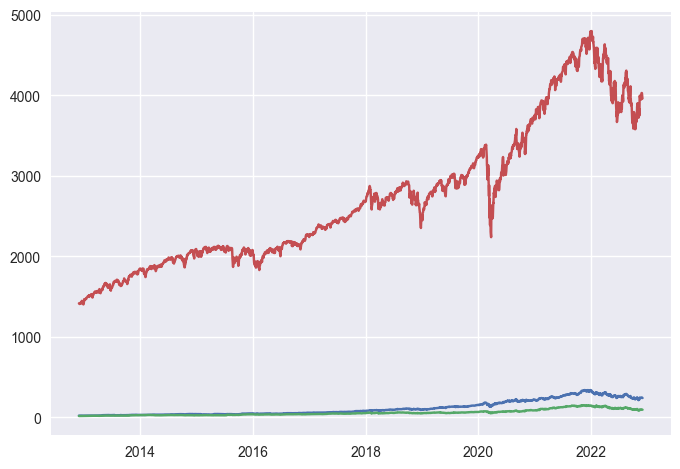

In [95]:
# to import OHLC data and save it as 'df_OHLC' DataFrame
tickers = ['MSFT', 'GOOG', '^GSPC']
df_OHLC = [] # deletes DataFrame in case it was created earlier
df_OHLC = pd.DataFrame() # creates empty DataFrame to store closing stock price data
for ticker in tickers: # loops through each ticker to download its closing share price and add it under a newe column of the DataFrame
    df_OHLC[ticker] = yf.Ticker(ticker).history(period='10y').Close
    # another way to do it is here: https://www.allthesnippets.com/notes/finance/calculating_cumulative_returns_of_stocks_with_python_and_pandas.html

# df_OHLC

# charts prices of all tickers on a single graph
plt.figure()
plt.plot(df_OHLC)
plt.show()

In [108]:
# chart cumulative return of all tickers in a single chart. Full instructions here: https://www.allthesnippets.com/notes/finance/calculating_cumulative_returns_of_stocks_with_python_and_pandas.html


ValueError: invalid literal for int() with base 10: '4.5'

In [97]:
# calculate (cumulative?) return per security using formula: (last price - initial price) / initial price
cum_return = (df_OHLC.iloc[-1] - df_OHLC.iloc[0]) / df_OHLC.iloc[0]
cum_return

MSFT     9.821430
GOOG     4.537439
^GSPC    1.796751
dtype: float64

In [67]:
# imports OHLC data and save it as 'df_OHLC' DataFrame
df_OHLC = ticker.history(period='12y')

# adds a column with ticker name
df_OHLC['Ticker'] = tickers
# df_OHLC
df_OHLC.columns

# chart data for the most recent 5000 datapoints
price_chart = alt.Chart(df_OHLC.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    color='Ticker'
).interactive(bind_y=False)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')

In [41]:
# Use this third-party template to loop through multiple tickers

def get_data(company_name):
    data = yf.download(company_name, period='7y')
    price = alt.Chart(data.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date', 'Open', 'High', 'Low', 'Volume']).properties(
    width=800, height=300)
    
    volume = alt.Chart(data.reset_index()).mark_line().encode(
    x='Date:T',
    y='Volume').properties(width=800, height=60)
       
    return price & volume

get_data('GOOGL')

[*********************100%***********************]  1 of 1 completed


alt.VConcatChart(...)